# The GitHub History of Scala Language Analysis <br> 
### Analyze  the real world project repository of Scala using python <br>

#### Dataset includes:
<ul>
<li><code>pulls_2011-2013.csv</code> contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.</li>
<li><code>pulls_2014-2018.csv</code> contains identical information, and spans from 2014 up to 2018.</li>
<li><code>pull_files.csv</code> contains the files that were modified by each pull request.</li>
</ul>

Data Time Range: December 2011 till January 2018

### Questions to answer  through the data:
<ol>
    <li> Determine number of different pulls done? </li>
    <li> Determine number of different users made the pull requests </li>
    <li> Determine number of different files changed </li>
    <li> Track number of pulls and users on monthly and yearly basis </li>
    <li> Get top users with the highest pull requests </li>
    <li> Get the recent files changed in the repo </li>
    <li> Trace selected file by determine top users changed the file frequently and most recent users changed the file </li>
    <li>Trace selected users by tracking their activity along the years and tracking their activity on the target file </li>

#### Data Manipulation Techniques this notebook focus on: 
#### (Join [ Inner-Semi-Anti ], GroupBy with different aggregate functions, Data Slicing, Pivot Table) <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pulls_one = pd.read_csv(r'E:\ITI\Portofolio\Scala Github History Analysis\pulls_2011-2013.csv')
pulls_two = pd.read_csv(r'E:\ITI\Portofolio\Scala Github History Analysis\pulls_2014-2018.csv')
pull_files = pd.read_csv(r'E:\ITI\Portofolio\Scala Github History Analysis\pull_files.csv')

### EDA

In [3]:
data = [pulls_one , pulls_two , pull_files]

for df in data:
    print(df.columns)
    print(df.shape)
    print(df.dtypes)

Index(['pid', 'user', 'date'], dtype='object')
(3296, 3)
pid      int64
user    object
date    object
dtype: object
Index(['pid', 'user', 'date'], dtype='object')
(2904, 3)
pid      int64
user    object
date    object
dtype: object
Index(['pid', 'file'], dtype='object')
(85588, 2)
pid      int64
file    object
dtype: object


In [4]:
for df in data:
    print(df.head())

        pid         user                  date
0  11166973  VladimirNik  2013-12-31T23:10:55Z
1  11161892      Ichoran  2013-12-31T16:55:47Z
2  11153894      Ichoran  2013-12-31T02:41:13Z
3  11151917      rklaehn  2013-12-30T23:45:47Z
4  11131244        qerub  2013-12-29T17:21:01Z
         pid       user                  date
0  163314316     hrhino  2018-01-16T23:29:16Z
1  163061502   joroKr21  2018-01-15T23:44:52Z
2  163057333  mkeskells  2018-01-15T23:05:06Z
3  162985594      lrytz  2018-01-15T15:52:39Z
4  162838837  zuvizudar  2018-01-14T19:16:16Z
         pid                                   file
0  163314316        test/files/pos/t5638/Among.java
1  163314316       test/files/pos/t5638/Usage.scala
2  163314316             test/files/pos/t9291.scala
3  163314316             test/files/run/t8348.check
4  163314316  test/files/run/t8348/TableColumn.java


In [5]:
#check duplicate records
for df in data:
    print(df[df.duplicated(subset=None, keep='first')] == True)

Empty DataFrame
Columns: [pid, user, date]
Index: []
Empty DataFrame
Columns: [pid, user, date]
Index: []
Empty DataFrame
Columns: [pid, file]
Index: []


In [6]:
#concat the separately time ranges data
pulls = pd.concat([pulls_one , pulls_two], ignore_index=True) 

In [7]:
pulls.shape

(6200, 3)

In [8]:
print(f"Number of unique pulls {pulls['pid'].nunique()} ")

Number of unique pulls 6200 


In [9]:
print("Number of different users is {} that made all the {} pulls".format( pulls['user'].nunique() , pulls['pid'].nunique() ))

Number of different users is 467 that made all the 6200 pulls


In [10]:
pulls.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


In [11]:
pulls.isna().sum()

pid     0
user    0
date    0
dtype: int64

In [12]:
pulls['date'] = pd.to_datetime(pulls['date'] , utc=True)
pulls.dtypes

pid                   int64
user                 object
date    datetime64[ns, UTC]
dtype: object

In [13]:
#pull ids recorderd with file updates  (Semi Join)
print(pulls[pulls['pid'].isin(pull_files['pid'])])

           pid         user                      date
0     11166973  VladimirNik 2013-12-31 23:10:55+00:00
1     11161892      Ichoran 2013-12-31 16:55:47+00:00
2     11153894      Ichoran 2013-12-31 02:41:13+00:00
3     11151917      rklaehn 2013-12-30 23:45:47+00:00
4     11131244        qerub 2013-12-29 17:21:01+00:00
...        ...          ...                       ...
6195  11244241       folone 2014-01-06 09:07:34+00:00
6196  11240674     clhodapp 2014-01-06 03:52:23+00:00
6197  11234757      xeno-by 2014-01-05 12:23:24+00:00
6198  11231462      rklaehn 2014-01-04 22:42:02+00:00
6199  11188295      rklaehn 2014-01-02 18:55:33+00:00

[6179 rows x 3 columns]


In [14]:
#Anti Join - pulls recorded in pulls but doesn't in pull_files 
left_filter_join = pulls.merge(pull_files, on='pid', how='left', indicator=True)
pull_records_only = left_filter_join.loc[left_filter_join['_merge'] == 'left_only' , :]
print(pull_records_only.shape)
print(list(pull_records_only['pid']))

(21, 5)
[10120652, 3966195, 2491741, 2225605, 1779672, 1013726, 546847, 151216062, 135459929, 133164775, 120487848, 113456440, 90175772, 84269933, 65659420, 32412194, 28413956, 21758987, 21216864, 17316176, 13871994]


In [15]:
#Anti Join - pulls recorded in pull_files but doesn't in pulls records
right_filter_join = pulls.merge(pull_files, on='pid', how='right', indicator=True)
pull_files_records_only = right_filter_join.loc[right_filter_join['_merge'] == 'right_only' , :]
pull_files_records_only.shape

(0, 5)

In [16]:
print("No of unique pulls that changed files are {} made {} change".format(pull_files['pid'].nunique(),pull_files.shape[0]))

print("No of different files changed {} out of {} change".format(pull_files['file'].nunique(), pull_files.shape[0] ))

No of unique pulls that changed files are 6179 made 85588 change
No of different files changed 14992 out of 85588 change


In [17]:
#Merge Data (Inner Join)
scala_data = pulls.merge(pull_files, on='pid')
print(scala_data.shape)
scala_data.head()

(85588, 4)


,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


In [18]:
scala_data['year'] = scala_data['date'].dt.year
scala_data['month'] = scala_data['date'].dt.month_name()
scala_data['hour_of_day'] = scala_data['date'].dt.hour
scala_data.head()

,pid,user,date,file,year,month,hour_of_day
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala,2013,December,23
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala,2013,December,23
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check,2013,December,23
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...,2013,December,23
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....,2013,December,16


In [19]:
#Trace data counts on monthly based
counts = scala_data.groupby(['year','month']).count()
counts 

pid  user  date  file  hour_of_day
year month                                         
2011 December    590   590   590   590          590
2012 April      3354  3354  3354  3354         3354
     August     3718  3718  3718  3718         3718
     December   2893  2893  2893  2893         2893
     February    787   787   787   787          787
...              ...   ...   ...   ...          ...
2017 May         428   428   428   428          428
     November    172   172   172   172          172
     October     535   535   535   535          535
     September   578   578   578   578          578
2018 January     202   202   202   202          202

[74 rows x 5 columns]

<AxesSubplot:xlabel='year,month'>

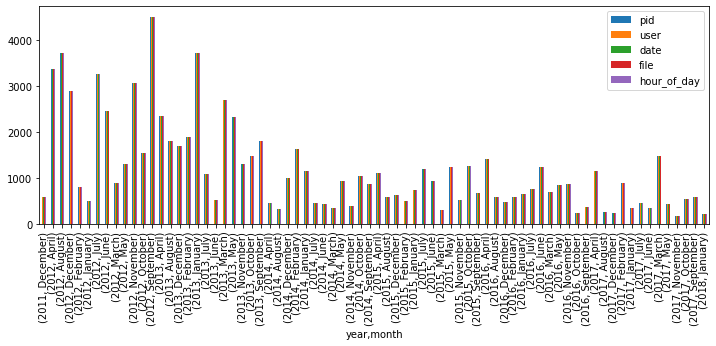

In [20]:
counts.plot(kind='bar', figsize = (12,4))

In [21]:
#Trace unique pulls, users, files on monthly based
unique_counts = scala_data.groupby(['year','month']).agg({'pid':'nunique', 'user':'nunique', 'file':'count'})
unique_counts

pid  user  file
year month                     
2011 December    82    19   590
2012 April      107    26  3354
     August     193    30  3718
     December   145    20  2893
     February    96    23   787
...             ...   ...   ...
2017 May         45    18   428
     November    45    19   172
     October     52    23   535
     September   54    17   578
2018 January     23    12   202

[74 rows x 3 columns]

<AxesSubplot:xlabel='year,month'>

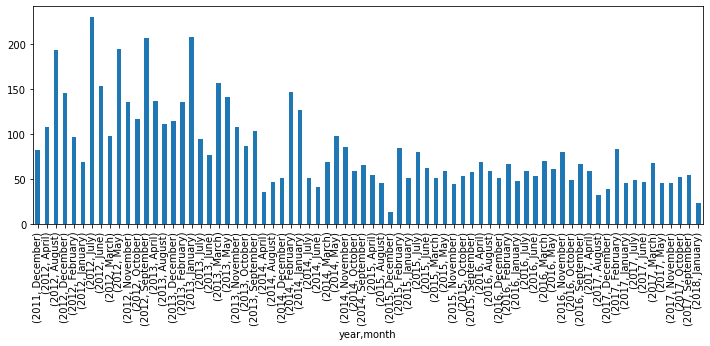

In [22]:
unique_counts['pid'].plot(kind='bar', figsize=(12,4))

<AxesSubplot:xlabel='year,month'>

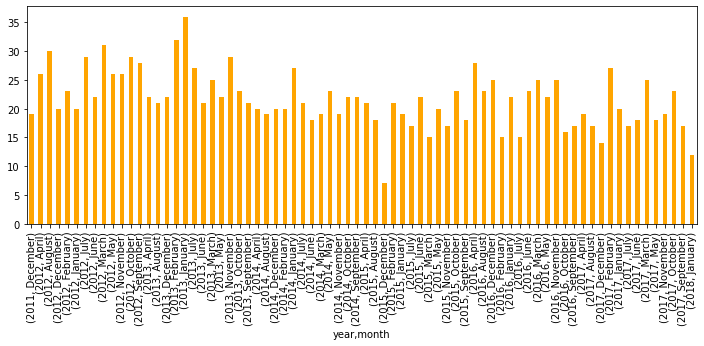

In [23]:
unique_counts['user'].plot(kind='bar', figsize=(12,4), color='orange')

<AxesSubplot:xlabel='year,month'>

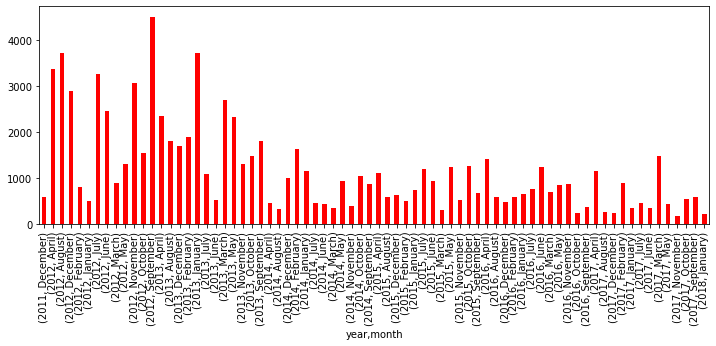

In [24]:
unique_counts['file'].plot(kind='bar', figsize=(12,4), color='red')

In [25]:
#Trace data counts on yearly based
count_per_year = scala_data.groupby(['year']).count()
count_per_year

,pid,user,date,file,month,hour_of_day
year,,,,,,
2011,590,590,590,590,590,590
2012,28190,28190,28190,28190,28190,28190
2013,22622,22622,22622,22622,22622,22622
2014,8979,8979,8979,8979,8979,8979
2015,9579,9579,9579,9579,9579,9579
2016,8609,8609,8609,8609,8609,8609
2017,6817,6817,6817,6817,6817,6817
2018,202,202,202,202,202,202


<AxesSubplot:xlabel='year'>

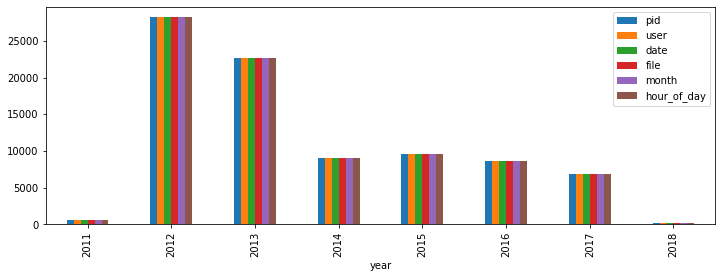

In [26]:
count_per_year.plot(kind='bar', figsize=(12,4))

In [27]:
#Trace unique pulls, users, files counts on yearly based
unique_counts_per_year = scala_data.groupby(['year']).agg({'pid':'nunique', 'user':'nunique'})
unique_counts_per_year

,pid,user
year,,
2011,82,19
2012,1741,95
2013,1466,122
2014,870,116
2015,652,112
2016,729,123
2017,616,103
2018,23,12


<AxesSubplot:xlabel='year'>

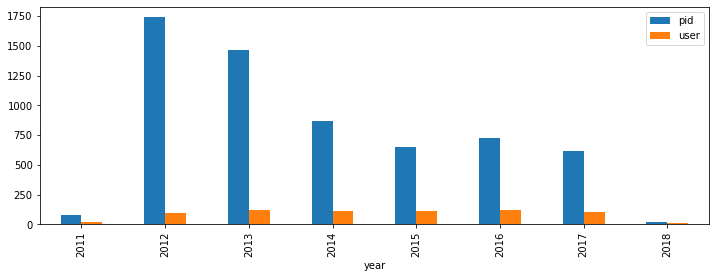

In [28]:
unique_counts_per_year.plot(kind='bar', figsize=(12,4))

In [29]:
#Get top frequent users
by_user = scala_data.groupby(['user']).agg({'pid':'count'}).sort_values(by='pid', ascending=False)
by_user.head()

,pid
user,
xeno-by,12649
retronym,11430
paulp,11260
adriaanm,7722
lrytz,6988


array([[<AxesSubplot:title={'center':'pid'}>]], dtype=object)

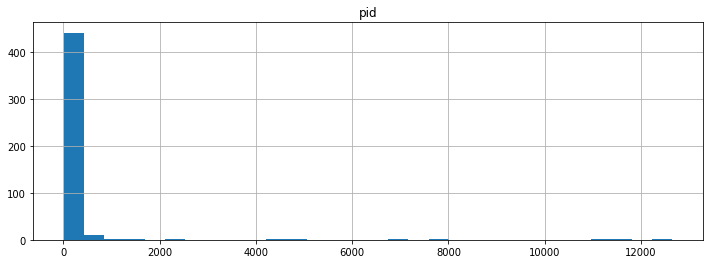

In [30]:
by_user.hist(figsize=(12,4), bins=30)

In [31]:
#Get lase changed files
last_files_changed = list(scala_data.sort_values(by='date', ascending=False).head(10)['file'])
last_files_changed 

['test/files/pos/t5638/Among.java',
 'test/files/pos/t5638/Usage.scala',
 'test/files/pos/t9291.scala',
 'test/files/run/t8348.check',
 'test/files/run/t8348/TableColumn.java',
 'test/files/run/t8348/TableColumnImpl.java',
 'test/files/run/t8348/Test.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala']

In [32]:
#Trace specific target file
selected_file = scala_data[scala_data['file'] == 'src/compiler/scala/reflect/reify/phases/Calculate.scala']
selected_file.head()

,pid,user,date,file,year,month,hour_of_day
1234,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013,December,10
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013,April,15
12823,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013,April,13
13381,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013,April,6
13779,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013,April,7


In [33]:
#Most frequent users changes this file
selected_file.groupby(['user']).count().sort_values(by='file',ascending=False).head(3)

,pid,date,file,year,month,hour_of_day
user,,,,,,
xeno-by,11,11,11,11,11,11
retronym,5,5,5,5,5,5
soc,4,4,4,4,4,4


In [34]:
#Most recent users changed this file
print(list(selected_file.sort_values(by='date',ascending=False).head(10)['user']))

['zuvizudar', 'retronym', 'xeno-by', 'retronym', 'soc', 'bjornregnell', 'retronym', 'retronym', 'starblood', 'retronym']


In [35]:
#Trace specific users 
authors = ['xeno-by', 'soc']

selected_authors_data = scala_data[scala_data['user'].isin(authors)]
selected_authors_data.head()

,pid,user,date,file,year,month,hour_of_day
25,11126653,xeno-by,2013-12-28 19:39:23+00:00,src/reflect/scala/reflect/internal/Mirrors.scala,2013,December,19
26,11126653,xeno-by,2013-12-28 19:39:23+00:00,test/junit/scala/reflect/internal/MirrorsTest....,2013,December,19
31,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a.check,2013,December,23
32,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Macros_1.scala,2013,December,23
33,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Test_2.scala,2013,December,23


In [36]:
#Trace their activity through the years
selected_authors_data_agg = selected_authors_data.groupby(['user','year'], as_index=False).agg({'pid':'count','file':'count'})

In [37]:
#pivot it to make it more readable
selected_authors_data_agg_wide = selected_authors_data_agg.pivot_table(index='user', columns='year', values='pid', fill_value=0)
selected_authors_data_agg_wide

year,2011,2012,2013,2014,2015,2016
user,,,,,,
soc,126,970,1659,373,618,604
xeno-by,147,8409,2873,1211,9,0


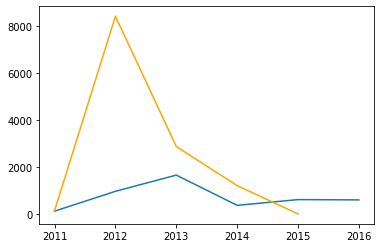

In [38]:
#Visualize their activity
plt.plot(selected_authors_data_agg[selected_authors_data_agg['user']=='soc']['year'], selected_authors_data_agg[selected_authors_data_agg['user']=='soc']['pid'])
plt.plot(selected_authors_data_agg[selected_authors_data_agg['user']=='xeno-by']['year'], selected_authors_data_agg[selected_authors_data_agg['user']=='xeno-by']['pid'], color='orange')

plt.show()

In [39]:
#Get their activity on our target file
target_experience = selected_authors_data[selected_authors_data['file'] == 'src/compiler/scala/reflect/reify/phases/Calculate.scala' ]
target_experience.groupby(['user']).agg({'pid':'count'})

,pid
user,
soc,4
xeno-by,11
